In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

#Import the data as a DataFrame
nycairbnb = pd.read_csv('C:/Users/13606/Desktop/Python scripts/AB_NYC_2019.csv')
nycairbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [3]:
print(nycairbnb['neighbourhood_group'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [4]:
print(nycairbnb['neighbourhood'].unique())

['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Forest Hills' 'Nolita'
 'Woodlawn' 'University Heights' '

In [5]:
nycairbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
nycairbnb.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [7]:
nycairbnb['days_occupied'] = 365 - nycairbnb['availability_365']

In [8]:
nycairbnb.days_occupied.head()

0      0
1     10
2      0
3    171
4    365
Name: days_occupied, dtype: int64

In [9]:
nyc_by_neigh = nycairbnb.pivot_table(index='neighbourhood_group', values=['days_occupied'], aggfunc='mean')

In [10]:
print(nyc_by_neigh.head())

                     days_occupied
neighbourhood_group               
Bronx                   199.241063
Brooklyn                264.767708
Manhattan               253.020590
Queens                  220.548182
Staten Island           165.321716


<Figure size 1000x1000 with 0 Axes>

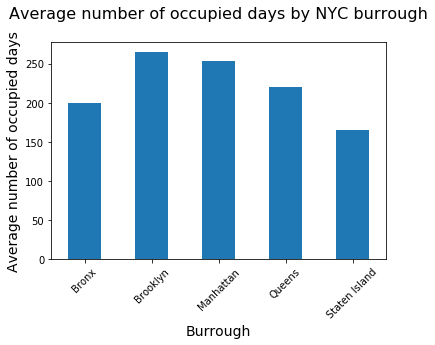

In [11]:
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 100

plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
nyc_by_neigh.plot.bar(legend=None)
plt.xticks(rotation=45)
plt.ylabel('Average number of occupied days', size=14)
plt.xlabel('Burrough', size=14)
plt.title('Average number of occupied days by NYC burrough', y=1.08, size=16)
plt.show()

In [12]:
nyc_by_neigh_price = nycairbnb.pivot_table(index=['neighbourhood', 'neighbourhood_group'], values=['days_occupied', 'price'], aggfunc='mean')
nyc_by_neigh_price.head(10)

,,days_occupied,price
neighbourhood,neighbourhood_group,,
Allerton,Bronx,201.333333,87.595238
Arden Heights,Staten Island,270.750000,67.250000
Arrochar,Staten Island,109.190476,115.000000
Arverne,Queens,176.571429,171.779221
Astoria,Queens,255.808889,117.187778
Bath Beach,Brooklyn,168.882353,81.764706
Battery Park City,Manhattan,264.671429,367.557143
Bay Ridge,Brooklyn,222.070922,144.432624
Bay Terrace,Queens,142.500000,142.000000


In [13]:
Bronx = nyc_by_neigh_price[nyc_by_neigh_price.index.get_level_values('neighbourhood_group') == 'Bronx']
Brooklyn = nyc_by_neigh_price[nyc_by_neigh_price.index.get_level_values('neighbourhood_group') == 'Brooklyn']
Manhattan = nyc_by_neigh_price[nyc_by_neigh_price.index.get_level_values('neighbourhood_group') == 'Manhattan']
Queens = nyc_by_neigh_price[nyc_by_neigh_price.index.get_level_values('neighbourhood_group') == 'Queens']
Staten_Island = nyc_by_neigh_price[nyc_by_neigh_price.index.get_level_values('neighbourhood_group') == 'Staten Island']

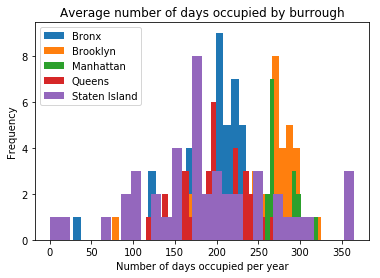

In [14]:
_ = plt.hist('days_occupied', histtype = 'stepfilled', bins=30, data=Bronx, label='Bronx')
_ = plt.hist('days_occupied', histtype = 'stepfilled', bins=30, data=Brooklyn, label='Brooklyn')
_ = plt.hist('days_occupied', histtype = 'stepfilled', bins=30, data=Manhattan, label='Manhattan')
_ = plt.hist('days_occupied', histtype = 'stepfilled', bins=30, data=Queens, label='Queens')
_ = plt.hist('days_occupied', histtype = 'stepfilled', bins=30, data=Staten_Island, label='Staten Island')
_ = plt.xlabel('Number of days occupied per year')
_ = plt.ylabel('Frequency')
_ = plt.title ('Average number of days occupied by burrough')
_ = plt.legend(loc='upper left')
plt.show()

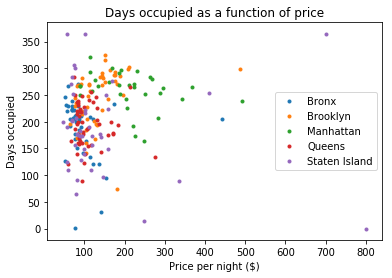

In [15]:
groups = nyc_by_neigh_price.groupby('neighbourhood_group')
for name, group in groups:
    _ = plt.scatter(group['price'], group['days_occupied'], data=nyc_by_neigh_price, marker='.', label=name)
    _ = plt.xlabel('Price per night ($)')
    _ = plt.ylabel('Days occupied')
    _ = plt.title('Days occupied as a function of price')
    _ = plt.legend()
plt.show()

__Observation:__ By calculating the average price per night per neighborhood, we see that there is more occupancy with lower prices than with higher prices, regardless of burrough. We will now segment by burrough to see if there are any nuances by neighborhood group.

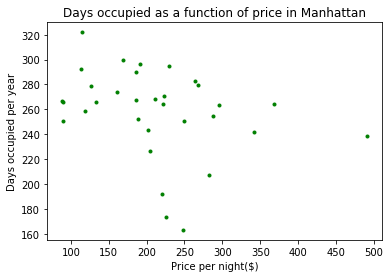

In [16]:
_ = plt.scatter('price', 'days_occupied', marker='.', data=Manhattan, c='g')
_ = plt.xlabel('Price per night($)')
_ = plt.ylabel('Days occupied per year')
_ = plt.title ('Days occupied as a function of price in Manhattan')

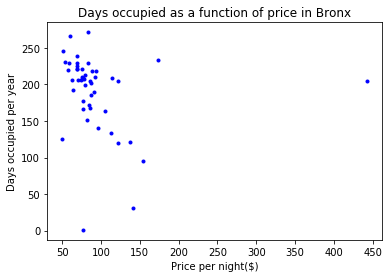

In [17]:
_ = plt.scatter('price', 'days_occupied', marker='.', data=Bronx, c='b')
_ = plt.xlabel('Price per night($)')
_ = plt.ylabel('Days occupied per year')
_ = plt.title ('Days occupied as a function of price in Bronx')

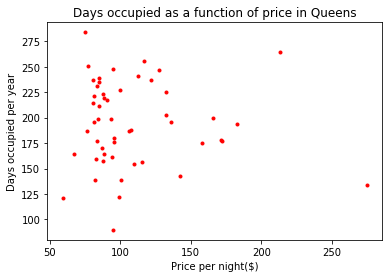

In [18]:
_ = plt.scatter('price', 'days_occupied', marker='.', data=Queens, c='r')
_ = plt.xlabel('Price per night($)')
_ = plt.ylabel('Days occupied per year')
_ = plt.title ('Days occupied as a function of price in Queens')

__Observation:__ The relationship between price and and days occupied is strongly correlated when it comes to neighborhoods that are in burroughs with less resources, such as the Bronx. In fact, there is a negative correlation between price and days occupied in the Bronx, compared to other burroughs seen, such as Queens or Manhattan. For others, such as those observed in Queens or Manhattan, we see more of a slightly positive relationship between price and days occupied, which may be renter expectations with location and quality. Lower-priced airbnbs may be perceived to to be of lower quality in these areas and are probably avoided more often.

In [19]:
nyc_roomtype = nycairbnb.loc[:, ['room_type', 'neighbourhood', 'neighbourhood_group',  'days_occupied']].copy()
print(nyc_roomtype.head())

         room_type neighbourhood neighbourhood_group  days_occupied
0     Private room    Kensington            Brooklyn              0
1  Entire home/apt       Midtown           Manhattan             10
2     Private room        Harlem           Manhattan              0
3  Entire home/apt  Clinton Hill            Brooklyn            171
4  Entire home/apt   East Harlem           Manhattan            365


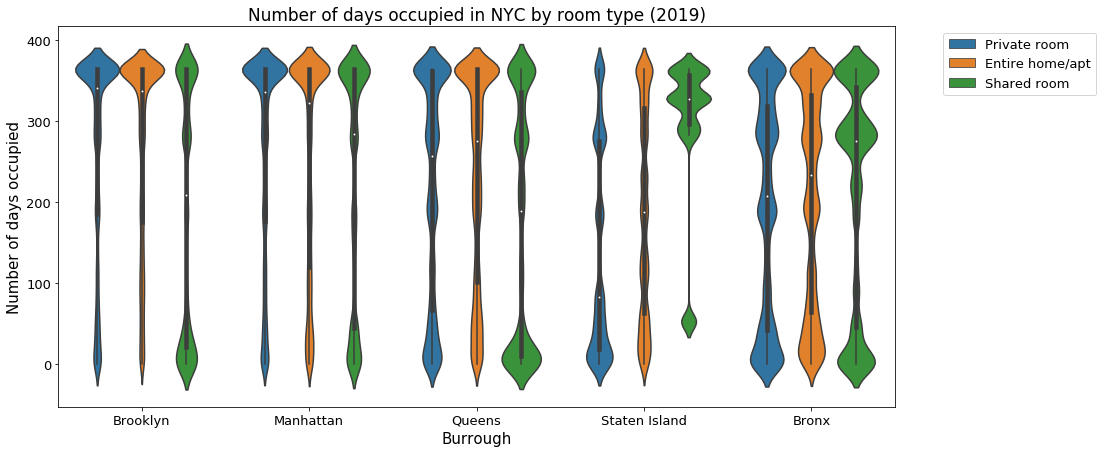

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.violinplot(x='neighbourhood_group', y='days_occupied', hue='room_type', data=nyc_roomtype, bw=0.1)
_ = plt.xlabel('Burrough', fontsize=15)
_ = plt.tick_params(labelsize=13)
_ = plt.ylabel('Number of days occupied', fontsize = 15)
_ = plt.title('Number of days occupied in NYC by room type (2019)', fontsize=17)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fancybox=True, fontsize=13)
plt.show()

__Observation:__ By using densities to observe the relationship between room type and number of days occupied per year, Brooklyn and Manhattan have higher occupancy in private rooms and entire apartments compared to shared rooms. The stories are a bit different for the other three borroughs. Although Queens has a slightly similar characteristic for private rooms and entire apartments, there is stil less occupancy for these by number of day density. We begin to see large differences for Staten Island, where shared rooms are actually the rentals with most occupancy compared to the other two room types. Finally, the Bronx seems to have an equal distribution of occupied days regardless of room type.

As a final step in this section, I will now confirm that there are no missing values for the 'days_occupied' column and determine any outliers.

In [21]:
boolean_series = pd.isnull(nycairbnb['days_occupied'])
nycairbnb[boolean_series]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_occupied


__Observation:__ As we can see, there are no missing data points for 'days_occupied'.

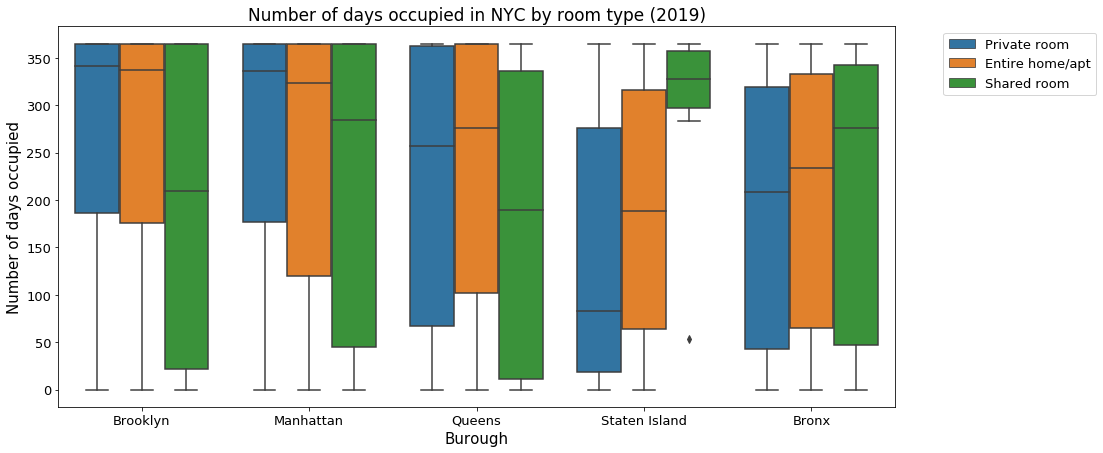

In [22]:
# Testing for outliers
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.boxplot(x='neighbourhood_group', y='days_occupied', hue='room_type', data=nyc_roomtype)
_ = plt.xlabel('Burough', fontsize=15)
_ = plt.tick_params(labelsize=13)
_ = plt.ylabel('Number of days occupied', fontsize = 15)
_ = plt.title('Number of days occupied in NYC by room type (2019)', fontsize=17)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fancybox=True, fontsize=13)
plt.show()

__Observation:__ There seems to be an observation with an outlier in the 'days_occupied' column. I will now select this row and review it to see if it has any unique characteristics. I will also create a new column with zscores to see if it qualifies as an outlier.

In [23]:
nycairbnb['zscore'] = zscore(nycairbnb['days_occupied'], ddof=1)

In [24]:
#Identifying potential outlier
nycairbnb.query('days_occupied < 55 & neighbourhood_group == "Staten Island" & room_type == "Shared room"')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_occupied,zscore
36327,28909477,Charming NYC Guest Suite (Loft Room),50756378,Nina,Staten Island,Clifton,40.61595,-74.08535,Shared room,150,2,2,2018-11-04,0.22,7,312,53,-1.513563


In [25]:
# Compare the mean price of Staten Island rentals with this "outlier"
np.round(nycairbnb['price'][nycairbnb['neighbourhood_group']=='Staten Island'].mean(), 2)

114.81

In [26]:
# Compare the mean of price of Staten Island rentals that are also shared rooms with this "outlier"
np.round(nycairbnb['price'][(nycairbnb['neighbourhood_group']=='Staten Island') & (nycairbnb['room_type']=='Shared room')].mean(), 2)

57.44

__Observation:__ Compared to prices of all rentals in Staten Island, this so-called outlier is 36 dollars more than the average rental in Staten Island. However, the average price of shared rentals in Staten Island is only 57 dollars, a 93 dollar difference. Contextually, it is not unreasonable to assume that this listing exists in Staten Island and that this listing had this measure of occupancy. Therefore, I will not treat it as an outlier.

In [27]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

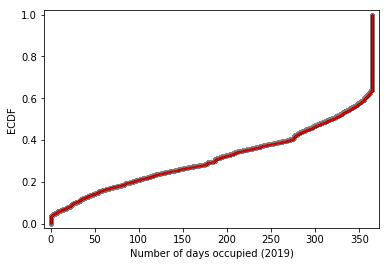

In [44]:
for _ in range(50000):
    bs_sample = np.random.choice(nycairbnb['days_occupied'], len(nycairbnb['days_occupied']))

 # Compute and plot ECDF from bootstrap sample
x_sam, y_sam = ecdf(bs_sample)
_ = plt.plot(x_sam, y_sam, marker='.', linestyle='none', color='gray', alpha=0.2)

# Compute and plot ECDF from original data
x, y = ecdf(nycairbnb['days_occupied'])
_ = plt.plot(x, y, marker='.', alpha=0.5, markersize=0.05, color='red')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Number of days occupied (2019)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [45]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [46]:
print(bootstrap_replicate_1d(bs_sample, np.mean))

252.00523570917272


In [47]:
print(nycairbnb['days_occupied'].mean())

252.21867266591676


In [60]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = []

    # Generate replicates
    for i in range(size):
        rep = bootstrap_replicate_1d(data, func)
        bs_replicates.append(rep)
    bs_np_replicates = np.array(bs_replicates)

    return bs_np_replicates

0.5952409105227386
0.5997520946197316


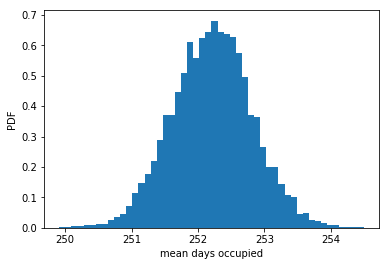

In [62]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(nycairbnb['days_occupied'], np.mean, size=10000)

# Compute and print SEM
sem = np.std(nycairbnb['days_occupied']) / np.sqrt(len(nycairbnb['days_occupied']))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean days occupied')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [63]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('The confidence interval of the number of days occupied is: ', conf_int)

The confidence interval of the number of days occupied is:  [251.04960579 253.39842929]
